In [1]:
print('Welcome to Capstone project')

Welcome to Capstone project


# Introduction about the project

This project is having having raw information of a bank, which is having two data sets with names, bank & bank-full. Data sets are provied with customer's personal information like their age, job details, marital status, and their loan history like whether they housing loan, personal loan and whether they have default history and what is the balance in their accounts. And datasets are also provided with the information like how many times bank has contacted customers during campaigns and in what mode thay have contacted and in which month, which day of the weeek and what is duration of the calls made to customer. It has also having the information related to previous campaigns like o of times contacted during previous campaign, how many days passed, out come of the previous campaign. Finally It is having Y column, where the output i.e. Term Deposit opening by customer is success or not.

## AIM of the Project:
Our AIM is to analyse and find the customer base, who are more likely to buy the Bank's products during campaigns by using various given parameters.


# Summery about all attributes

1. Age: The is numerical feature, tells about age of the customers.
2. Job: It is a categorical feature, tells about what type of job, customers are doing.
3. marital: It is a categorical feature, tells about the status of customer like married, single, divorced.
4. education: It is a categorical feature (Ordinal), describes about the qualification of the customers.
5. default: It is a categorical variable, describes about the credit history of the customers i.e. any default in committed payments.
6. balance: It is a categorical variable, describes about the present outstanding in the accounts of the customers.
7. housing: It is a categorical variable, tells us whether customers are having any housing loans.
8. loan:It is a categorical variable, tells us whether customers are having any personal loans.
9. contact: It is a Numerical variable, having information regarding number of calls made to customers during this campaign. It includes last contact also.
10. day: It is a Numerical variable.
11. month:It is a categorical variable, which indicates the last contact month information.
12. duration:It is a Numerical variable. It tells that, how much time spoke with customer for canvassing FD from him. It is very important variable in respect of output. If duration is 0 then output is failed.
13. campaign: It is numerical column, which tell number of times contacted during this campaign. 
14. pdays: It is a Numerical variable, having information regarding number of days passed by from last call made to customers during last campaign.
15. previous: It is a Numerical variable, tells us number of contacts performed before this campaign.
16. poutcome: It is a categorical variable, tells us whether customers have availed FD during last campaign.
17. Y: It is categorical feature and it is Output column. It has Yes and No values, which means Success and Fail.

       

  Importing all required liabraries

In [30]:
import pandas as pd                                    # Importing all required liabraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

   Importing input files using Google Colab

In [3]:
from google.colab import files                        # Importing input files using Google Colab
uploaded=files.upload()

Saving bank-full.csv to bank-full.csv


In [5]:
Bankfull=pd.read_csv('bank-full.csv',sep=';')         # Reading CSV file into Colab using pandas. Using ';' seperator
print('file imported successfully','\n\n')
Bankfull.head()                                       # Getting top 5 observations

file imported successfully 




age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [6]:
Bankfull.tail()                                      # Getting bottom 5 observations

age           job   marital  education default  balance housing loan  \
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no

In [7]:
Bankfull.shape                                    # finding the shape of the dataset

(45211, 17)

The above input file has 45211 observations in 17 columns

In [4]:
from google.colab import files
uploaded=files.upload()

Saving bank.csv to bank.csv


In [8]:
Bank=pd.read_csv('bank.csv', sep=';')                    # Reading CSV file into Colab using pandas. Using ';' seperator  
print('file imported successfully','\n\n')                              
Bank.head()                                              # Getting top 5 observations

file imported successfully 




age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

In [9]:
Bank.tail()                                              # Getting bottom 5 observations

age            job  marital  education default  balance housing loan  \
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  duration  campaign  pdays  previous poutcome   y  
4516  cellular   30   jul       329         5     -1         0  unknown  no  
4517   unknown    9   may       153         1     -1         0  unknown  no  
4518  cellular   19   aug       151        11     -1         0  unknown  no  
4519  cellular    6   feb       129         4    211         3    other  no  
4520  cellular    3   apr       345         2    249         7    other  no

In [11]:
Bank.shape                                                # finding the shape of the dataset to know the no of columns and rows

(4521, 17)

The above input file has 4521 observations in 17 columns

#Observing columns in both datasets

In [12]:
Bankfull.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [13]:
Bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

The above two data sets are having same column names and no of columns in both data sets are equal i.e. 17.

# Merging both datasets

In [14]:
Bank_final=pd.concat([Bankfull,Bank])                      # Merging two files and getting shape of the merged file
Bank_final.shape

(49732, 17)

The merged data set is having a total observations of 49732 with 17 columns

In [15]:
Bank_final.head()                                         # Getting top 5 observations

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [16]:
Bank_final.tail()                                          # Getting bottom 5 observations

age            job  marital  education default  balance housing loan  \
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  duration  campaign  pdays  previous poutcome   y  
4516  cellular   30   jul       329         5     -1         0  unknown  no  
4517   unknown    9   may       153         1     -1         0  unknown  no  
4518  cellular   19   aug       151        11     -1         0  unknown  no  
4519  cellular    6   feb       129         4    211         3    other  no  
4520  cellular    3   apr       345         2    249         7    other  no

In [17]:
Bank_final.info()                                    # Full information about the columns and its datatypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49732 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.8+ MB


In [18]:
Bank_final.dtypes                                          # Getting data types of the columns. The same information as mentioned in Info() will appear here

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [19]:
Bank_final.columns                                                             # Getting all column names using columns function

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [31]:
len(Bank_final.columns )

17

It may be observed that, all columns are available, after merger of two datsets.

In [20]:
Bank_final.describe(include = 'all')

age          job  marital  education default        balance  \
count   49732.000000        49732    49732      49732   49732   49732.000000   
unique           NaN           12        3          4       2            NaN   
top              NaN  blue-collar  married  secondary      no            NaN   
freq             NaN        10678    30011      25508   48841            NaN   
mean       40.957472          NaN      NaN        NaN     NaN    1367.761562   
std        10.615008          NaN      NaN        NaN     NaN    3041.608766   
min        18.000000          NaN      NaN        NaN     NaN   -8019.000000   
25%        33.000000          NaN      NaN        NaN     NaN      72.000000   
50%        39.000000          NaN      NaN        NaN     NaN     448.000000   
75%        48.000000          NaN      NaN        NaN     NaN    1431.000000   
max        95.000000          NaN      NaN        NaN     NaN  102127.000000   

       housing   loan   contact           day  month      duration  \
count    49732  49732     49732  49732.000000  49732  49732.000000   
unique       2      2         3           NaN     12           NaN   
top        yes     no  cellular           NaN    may           NaN   
freq     27689  41797     32181           NaN  15164           NaN   
mean       NaN    NaN       NaN     15.816315    NaN    258.690179   
std        NaN    NaN       NaN      8.315680    NaN    257.743149   
min        NaN    NaN       NaN      1.000000    NaN      0.000000   
25%        NaN    NaN       NaN      8.000000    NaN    103.000000   
50%        NaN    NaN       NaN     16.000000    NaN    180.000000   
75%        NaN    NaN       NaN     21.000000    NaN    320.000000   
max        NaN    NaN       NaN     31.000000    NaN   4918.000000   

            campaign         pdays      previous poutcome      y  
count   49732.000000  49732.000000  49732.000000    49732  49732  
unique           NaN           NaN           NaN        4      2  
top              NaN           NaN           NaN  unknown     no  
freq             NaN           NaN           NaN    40664  43922  
mean        2.766549     40.158630      0.576892      NaN    NaN  
std         3.099075    100.127123      2.254838      NaN    NaN  
min         1.000000     -1.000000      0.000000      NaN    NaN  
25%         1.000000     -1.000000      0.000000      NaN    NaN  
50%         2.000000     -1.000000      0.000000      NaN    NaN  
75%         3.000000     -1.000000      0.000000      NaN    NaN  
max        63.000000    871.000000    275.000000      NaN    NaN

The count is showing 49732, hence there is no missing value. The describe function is telling about mean, standard deviation,Min value, Maximum values of all numerical variables. The maximum balance held by any customer is 1012127.

# Finding Missing Values

In [25]:
Bank_final.isnull()

age    job  marital  education  default  balance  housing   loan  \
0     False  False    False      False    False    False    False  False   
1     False  False    False      False    False    False    False  False   
2     False  False    False      False    False    False    False  False   
3     False  False    False      False    False    False    False  False   
4     False  False    False      False    False    False    False  False   
...     ...    ...      ...        ...      ...      ...      ...    ...   
4516  False  False    False      False    False    False    False  False   
4517  False  False    False      False    False    False    False  False   
4518  False  False    False      False    False    False    False  False   
4519  False  False    False      False    False    False    False  False   
4520  False  False    False      False    False    False    False  False   

      contact    day  month  duration  campaign  pdays  previous  poutcome  \
0       False  False  False     False     False  False     False     False   
1       False  False  False     False     False  False     False     False   
2       False  False  False     False     False  False     False     False   
3       False  False  False     False     False  False     False     False   
4       False  False  False     False     False  False     False     False   
...       ...    ...    ...       ...       ...    ...       ...       ...   
4516    False  False  False     False     False  False     False     False   
4517    False  False  False     False     False  False     False     False   
4518    False  False  False     False     False  False     False     False   
4519    False  False  False     False     False  False     False     False   
4520    False  False  False     False     False  False     False     False   

          y  
0     False  
1     False  
2     False  
3     False  
4     False  
...     ...  
4516  False  
4517  False  
4518  False  
4519  False  
4520  False  

[49732 rows x 17 columns]

In [26]:
Bank_final.isnull().sum().sum()                    # Total null values in the dataset

0

In [ ]:
Bank_final.isnull().sum()                          # Total null values in the dataset, column wise

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## Showing pattern of Null Values using Matrix Plot

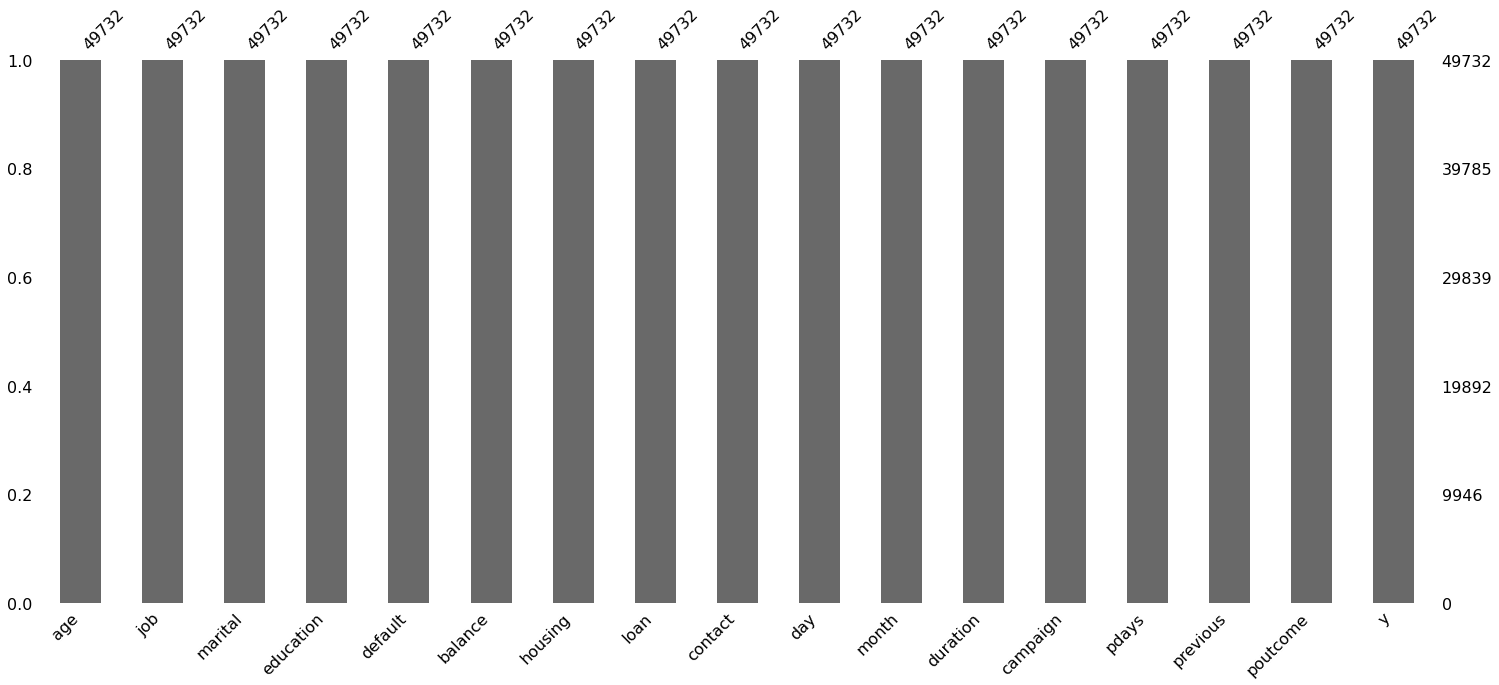

In [ ]:
import missingno as msno                          # Importing missingno library to visualise missing values pattern   
msno.bar(Bank_final)                              # Missing Values Pictorial Representation using matrix plot  library

Form the above it is observed that, there is no miising values in the data set. All the columns werefully occupied with information.

## Analysing all Attributes and Unique values

In [29]:
items=[feature for feature in Bank_final.columns]                            # Using for loop to iterate through the all columns of the dataset and to find unique values.

for feature in items:
  print( 'The unique values present in ', feature, ' column are \n', Bank_final[feature].unique(), '\n\n')

The unique values present in  age  column are 
 [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88] 


The unique values present in  job  column are 
 ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student'] 


The unique values present in  marital  column are 
 ['married' 'single' 'divorced'] 


The unique values present in  education  column are 
 ['tertiary' 'secondary' 'unknown' 'primary'] 


The unique values present in  default  column are 
 ['no' 'yes'] 


The unique values present in  balance  column are 
 [ 2143    29     2 ...  8205 14204 16353] 


The unique values present in  housing  column are 
 ['yes' 'no'] 


The unique values present in  loan  column are 
 ['no' 'yes'] 


The unique values present

The unique values present in different columns were shown above. The attributes like Job, education, Contact,poutcome are having 'Unknown' fields, which means the particular details of the person is not disclosed. 'poutcome' has 'other' fields also. It has also observed that, the balance of the customer is showing negative, which means the balance amount of the customer in the account is zero and in addittion to that, he owes to pay some amount to bank (it may be due to bank charges or any other reason) 

#Analysing Missing Values 

In [32]:
len(Bank_final [Bank_final.job == 'unknown'])                          # Finding unkonwn fields in JOB columns         

326

*Only 326 observations (out of 49736) of Job column is having 'Unknown' in the dataset, which is 0.65%. So it may be imputed with Mode.

In [33]:
Bank_final.job.replace(['unknown'],[Bank_final.job.mode()], inplace=True)          # Replacing Unknown fields with Mode.

In [34]:
len(Bank_final [Bank_final.job == 'unknown'])    

0

All unknown has been replaced with its Mode.

In [ ]:
len(Bank_final [Bank_final.education == 'unknown'])                                     # Finding unkonwn fields in education columns    

2044

*Only 2044 observations of  (out of 49736) of Education column is having 'Unknown' in the dataset. So it may be imputed with Mode.

In [ ]:
Bank_final.education.replace(['unknown'],[Bank_final.education.mode()], inplace=True)     # Replacing Unknown fields with Mode.

In [ ]:
len(Bank_final [Bank_final.education == 'unknown'])

0

All unknown has been replaced with its Mode.

In [ ]:
len(Bank_final [Bank_final.contact == 'unknown'])                            # Finding unkonwn fields in contact column

14344

*14344 observations of (out of 49736) of Contact column is having 'Unknown' in the dataset. So it may be imputed with Mode.

In [ ]:
len(Bank_final [Bank_final.poutcome == 'unknown'])                          # Finding unkonwn fields in poutcome column

40664

*It is observed that 40664 observations out of 49736 in poutcome colums is unknown. Hence it may not be considered for further analysis.

In [ ]:
len(Bank_final [Bank_final.pdays == -1])                                   # Finding -1 fields in pdays column

40659

*It is observed that 40659 observations out of 49736 in pdays colums is -1, which is undefined.

### Analysing Numerical columns 

In [ ]:
# list of numerical variables
numerical_columns = [feature for feature in Bank_final.columns if Bank_final[feature].dtypes != 'O']        # Using for loop and iterating through every column of dataset  
                                                                                                             # IF condition will check for Numerical columns
print('Number of numerical variables: ', len(numerical_columns))                                # Len  function will give the number of numerical columns

Bank_final[numerical_columns].head()                                                            # Showing the top five observations.

Number of numerical variables:  7


age  balance  day  duration  campaign  pdays  previous
0   58     2143    5       261         1     -1         0
1   44       29    5       151         1     -1         0
2   33        2    5        76         1     -1         0
3   47     1506    5        92         1     -1         0
4   33        1    5       198         1     -1         0

# Analysing Numerical Variables with plots

### Univariate Analysis for all Attributes using dist plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


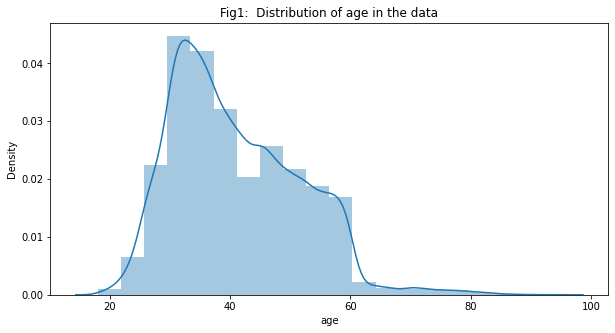

In [ ]:
#Pictorial representation of data
dist = sns.distplot(Bank_final['age'], bins=20, kde=True)
plt.title('Fig1: Distribution of age in the data')
dist.figure.set_size_inches(10,5)

The age of the customers is spread over 20 to 80 and maximum age group is lying at 25 to 60. Maximum density of age is at 30 to 40.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

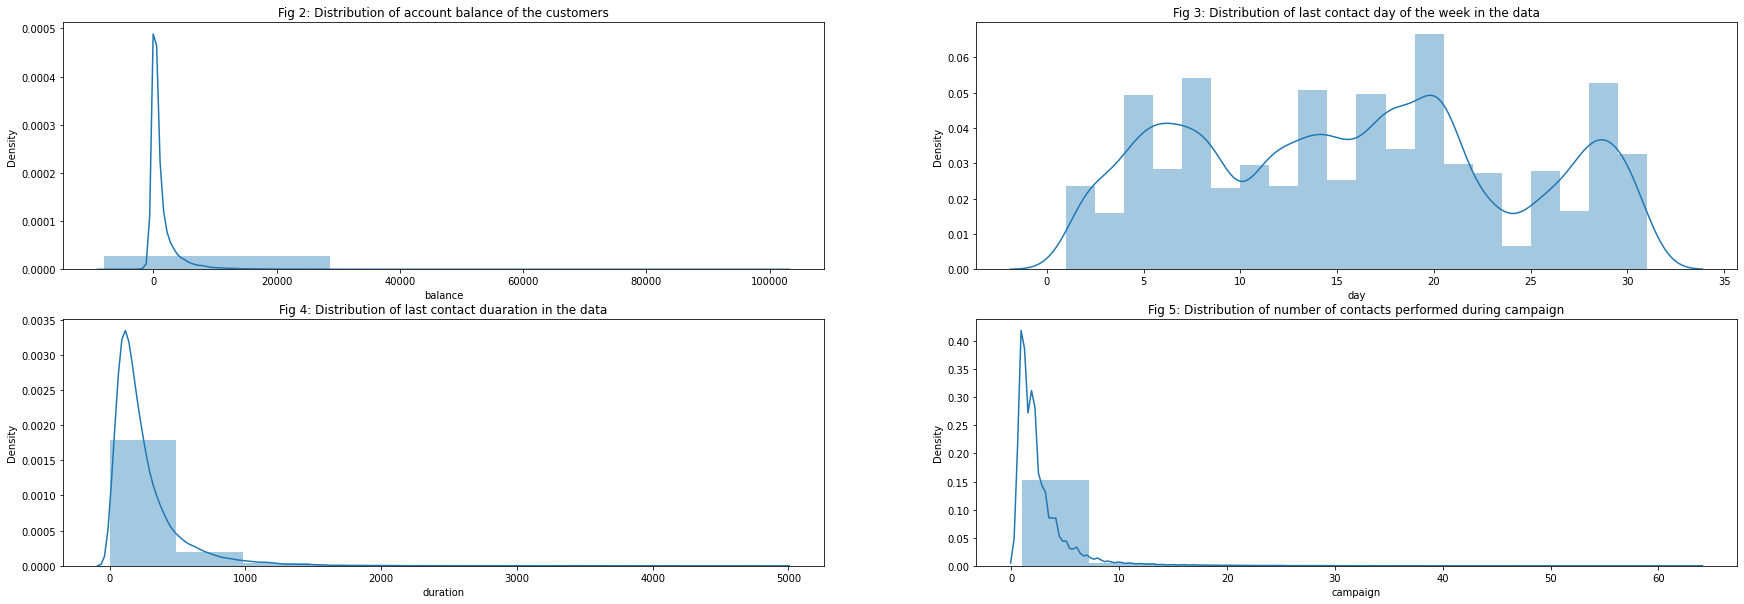

In [41]:
#Pictorial representation of data for other numerical variable
plt.subplot(2, 2, 1)
dist = sns.distplot(Bank_final['balance'], bins=3, kde=True)                    # Density plot For Balance column
plt.title('Fig 2: Distribution of account balance of the customers')
dist.figure.set_size_inches(30,10)

plt.subplot(2, 2, 2)
dist = sns.distplot(Bank_final['day'], bins=20, kde=True)                        # Density plot For Day column
plt.title('Fig 3: Distribution of last contact day of the week in the data')
dist.figure.set_size_inches(15,10)



plt.subplot(2, 2, 3)
dist = sns.distplot(Bank_final['duration'], bins=10, kde=True)                   # Density plot For Duration column
plt.title('Fig 4: Distribution of last contact duaration in the data')
dist.figure.set_size_inches(40,10)

plt.subplot(2, 2, 4)
dist = sns.distplot(Bank_final['campaign'], bins=10, kde=True)                   # Density plot For Campaign column
plt.title('Fig 5: Distribution of number of contacts performed during campaign')
dist.figure.set_size_inches(30,10)


* Comments:
1.Account balance: Account balance is in Negative also. And the maximum balance is upto 30000...
2.Day of the Week: The data is spread over 1st to 31st day of the month. During 8th,20th and 29th, maximum contacts made...
3.Duration: The duration is starting from Zero, which means NO result. Maximum density is lying at 0 to 250 seconds. Maximum data is lying at 0 to 500 seconds.Data is rightly skewed... 4. Campaign: Maximum contacts made is from 1 time to 8 times.

Account balance is having negative balances which means customer needs to pay the bank and Maximum balance maintaining in the account is around 30000 to 35000. Negative balances is holding in the accounts using LIEN concept.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


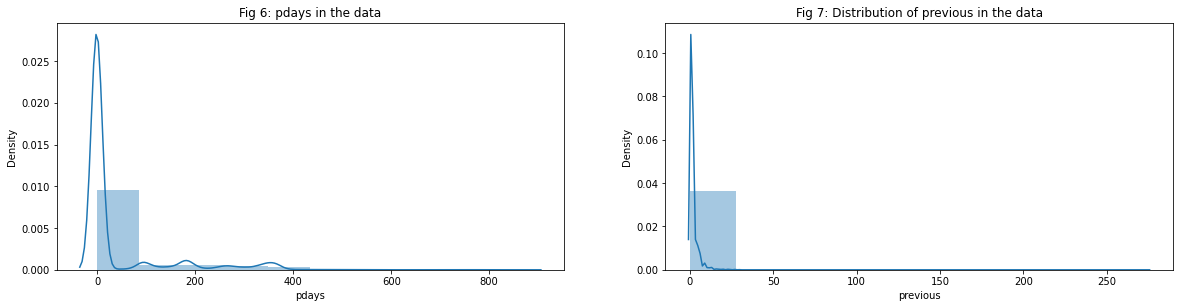

In [42]:

plt.subplot(2, 2, 1)
dist = sns.distplot(Bank_final['pdays'], bins=10, kde=True)
plt.title('Fig 6: pdays in the data')
dist.figure.set_size_inches(20,10)

plt.subplot(2, 2, 2)
dist = sns.distplot(Bank_final['previous'], bins=10, kde=True)
plt.title('Fig 7: Distribution of previous in the data')
dist.figure.set_size_inches(20,10)

* Comments:

1. pdays: Data is lying at 0 to 400 days but maximum density is at 0 to near 100 days....
2. previous: No of contacts made before this campaign data is lying at 0 to 25.

## Categorical variables

In [ ]:
categorical_columns=[feature for feature in Bank_final.columns if Bank_final[feature].dtypes =='O']
categorical_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [ ]:
Bank_final[categorical_columns].head()    

job  marital  education default housing loan  contact month  \
0    management  married   tertiary      no     yes   no  unknown   may   
1    technician   single  secondary      no     yes   no  unknown   may   
2  entrepreneur  married  secondary      no     yes  yes  unknown   may   
3   blue-collar  married  secondary      no     yes   no  unknown   may   
4   blue-collar   single  secondary      no      no   no  unknown   may   

  poutcome   y  
0  unknown  no  
1  unknown  no  
2  unknown  no  
3  unknown  no  
4  unknown  no

#Uni-Variate Analysis for categorical values using Count Plot

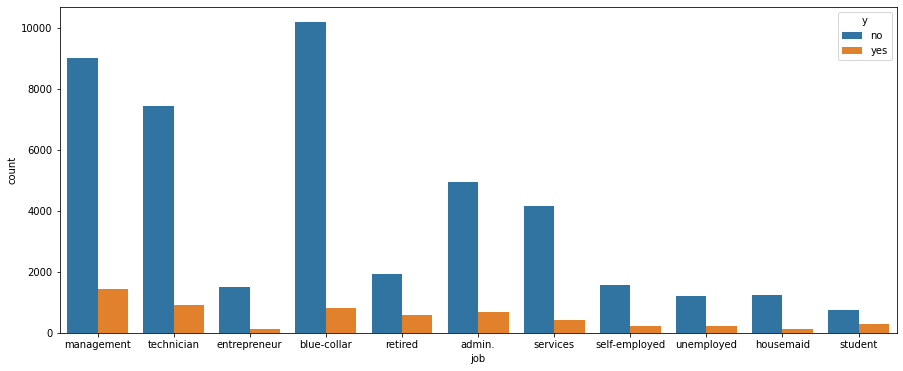

In [65]:
plt.figure(figsize=(15,6))
sns.countplot(x='job', hue= 'y', data=Bank_final)
plt.show()

* Comments:
Management customers has taken more TDRs compared to any other category. Enterprenuers and Housemaid's contribution in TDR is very very less.

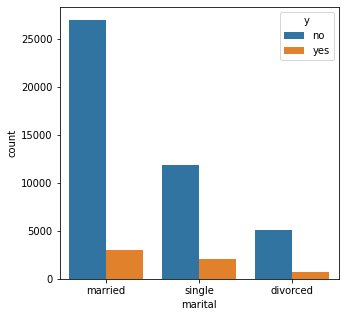

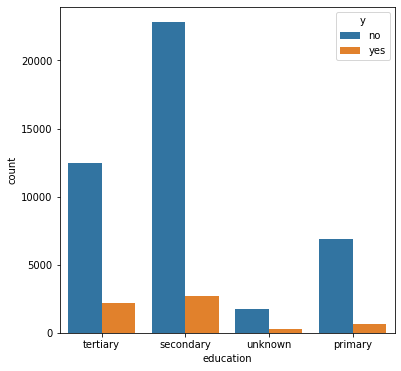

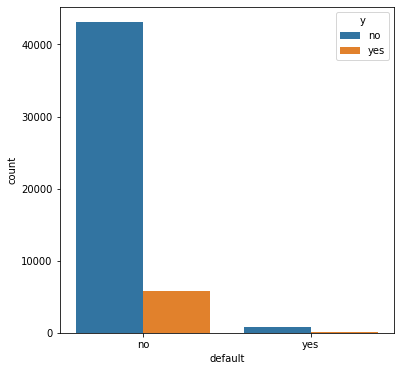

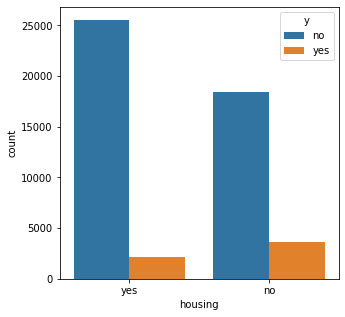

In [49]:
plt.figure(figsize=(5,5))
sns.countplot(x='marital', hue= 'y', data=Bank_final)
plt.show()


plt.figure(figsize=(6,6))
sns.countplot(x='education', hue= 'y', data=Bank_final)
plt.show()

plt.figure(figsize=(6,6))
sns.countplot(x='default', hue= 'y', data=Bank_final)
plt.show()

plt.figure(figsize=(5,5))
sns.countplot(x='housing', hue= 'y', data=Bank_final)
plt.show()




* Comments:
Marital: Married, single or divorced, term deposit not having people or more.Married group has taken more FDR compared to other two categories.

Education: Secondary grade people has taken more term depots and primary has less.

Default: Defaulters TDR percentage is very very less.

Housing:Customers who has Housing loans has not taken terms deposits compared to who has no housing loans.

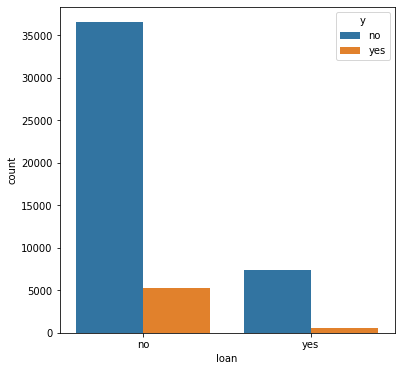

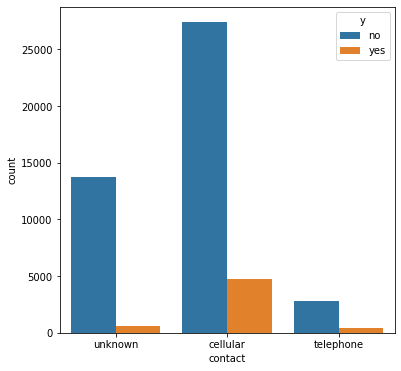

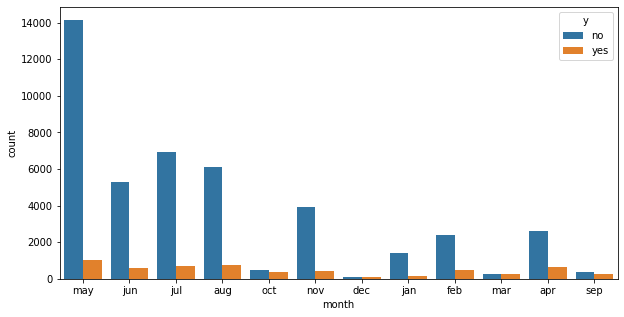

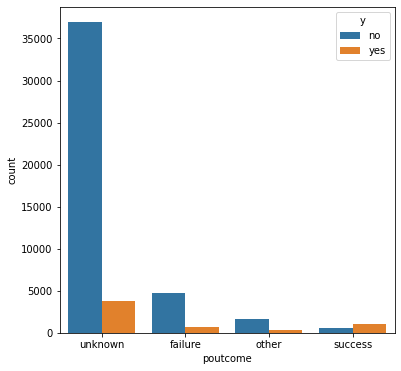

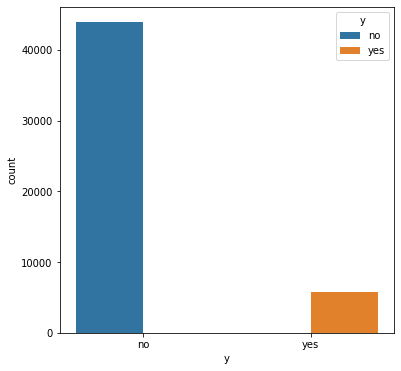

In [50]:
plt.figure(figsize=(6,6))
sns.countplot(x='loan', hue= 'y', data=Bank_final)
plt.show()

plt.figure(figsize=(6,6))
sns.countplot(x='contact', hue= 'y', data=Bank_final)
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(x='month', hue= 'y', data=Bank_final)
plt.show()


plt.figure(figsize=(6,6))
sns.countplot(x='poutcome', hue= 'y', data=Bank_final)
plt.show()


* Comments:
Customers who dont have personal loan has availed more TDRs compare to others.
.
Cellular contact have brought more Term deposits to the bank.
.
During April, May, July & August, customers have invested in bank deposits.
.
Customers who have taken TD during previous campaign are taken more TDs during this campaign.

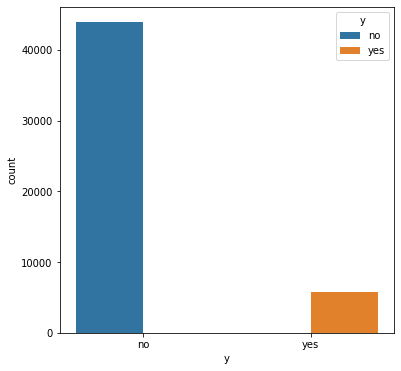

In [67]:
# Data of people who has availed and not availed Term Deposits

plt.figure(figsize=(6,6))
sns.countplot(x='y', hue= 'y', data=Bank_final)
plt.show()

*Comments: The customers who has availed term deposits are very less and it is less than 5000.

# Bi-Variate Analysis of Numerical variables Vs Outcome

Bar plot for analysing BI variate analysis between Numerical and Outcome

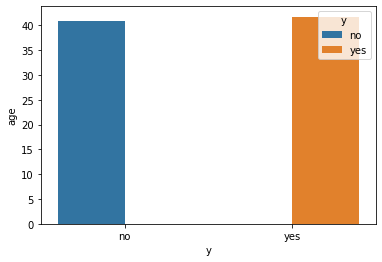

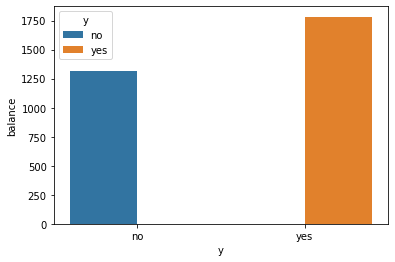

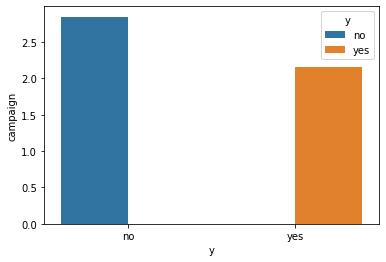

In [71]:

sns.barplot(x='y',y='age', hue= 'y', data=Bank_final,ci=None)
plt.show()


sns.barplot(x='y',y='balance', hue= 'y', data=Bank_final,ci=None)
plt.show()


sns.barplot(x='y',y='campaign', hue= 'y', data=Bank_final,ci=None)
plt.show()

*comments:

Customers who are maintaining good balances in their accounts has taken more TDRs compared other category.



# Bi-Variate Analysis of categorical variables Vs Outcome

job',  'marital',  'education',  'default',  'housing',  'loan',  'contact',
 'month',  'poutcome'.


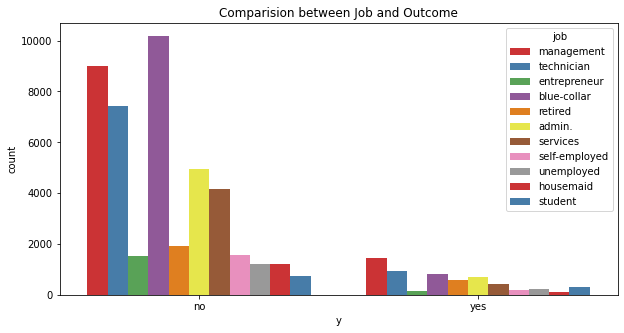

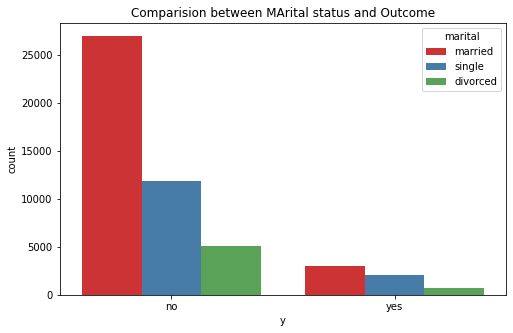

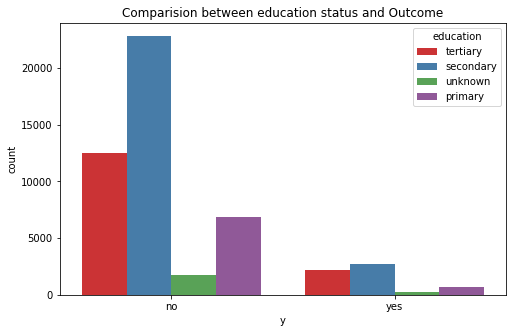

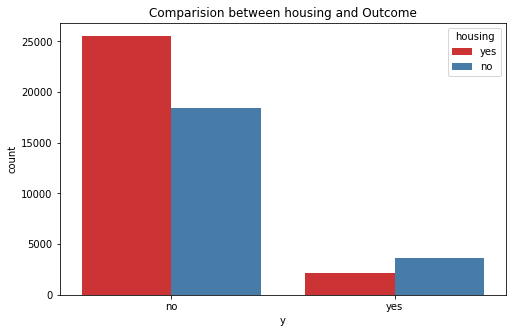

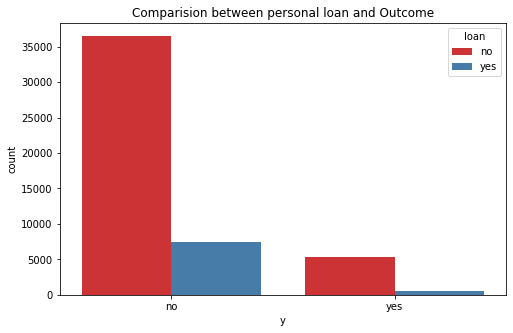

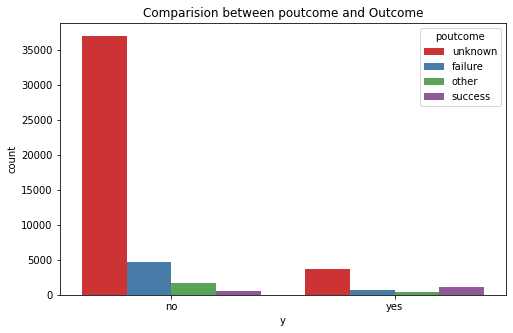

In [72]:
plt.figure(figsize=(10,5))
sns.countplot(x='y', hue='job', palette='Set1', data = Bank_final)
plt.title('Comparision between Job and Outcome')
plt.show()


plt.figure(figsize=(8,5))
sns.countplot(x='y', hue='marital', palette='Set1', data = Bank_final)
plt.title('Comparision between MArital status and Outcome')
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(x='y', hue='education', palette='Set1', data = Bank_final)
plt.title('Comparision between education status and Outcome')
plt.show()


plt.figure(figsize=(8,5))
sns.countplot(x='y', hue='housing', palette='Set1', data = Bank_final)
plt.title('Comparision between housing and Outcome')
plt.show()


plt.figure(figsize=(8,5))
sns.countplot(x='y', hue='loan', palette='Set1', data = Bank_final)
plt.title('Comparision between personal loan and Outcome')
plt.show()


plt.figure(figsize=(8,5))
sns.countplot(x='y', hue='poutcome', palette='Set1', data = Bank_final)
plt.title('Comparision between poutcome and Outcome')
plt.show()

*Comments:

Managerial Job holders have taken more TDRs and Housemaid have taken less.
.

Married has taken more TDRs whereas divorced has taken less.
.

Secondary graded educated people has taken more TDS and primary are less in number.


Customers who has not availed housing loan have taken more TDRs.


Customers who has has availed TD during last campaign taken more TDRs.




# Analysis about Outliers in Numerical variables

In [ ]:
Bank_final.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

Box plot for visualising outliers

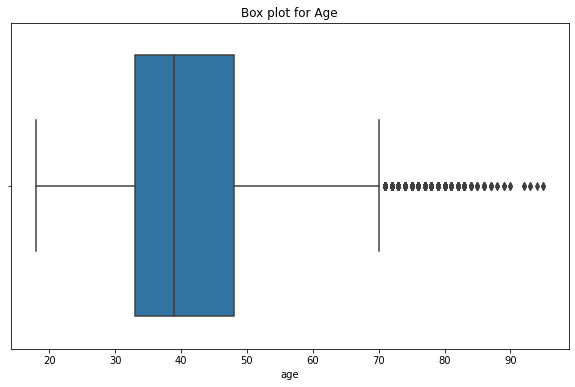

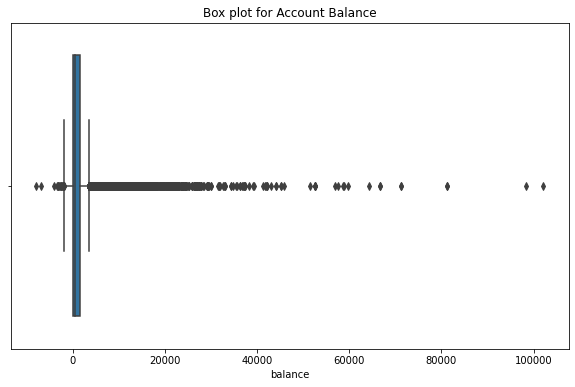

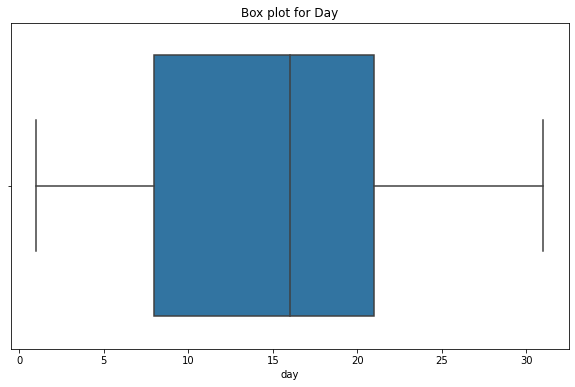

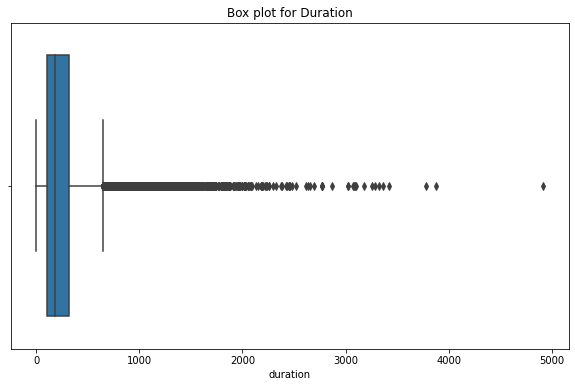

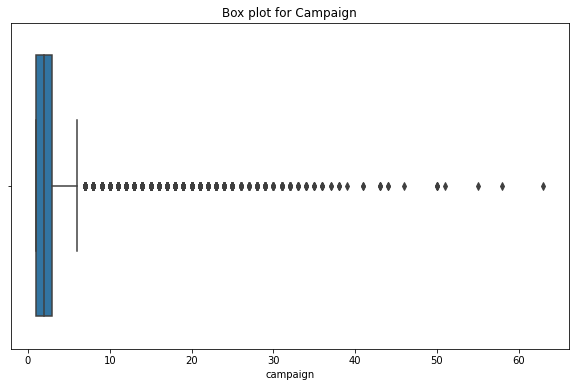

In [53]:
# Box plot
plt.figure(figsize=(10,6))
sns.boxplot(x='age', data=Bank_final)
plt.title('Box plot for Age')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='balance', data=Bank_final)
plt.title('Box plot for Account Balance')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='day', data=Bank_final)
plt.title('Box plot for Day')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='duration', data=Bank_final)
plt.title('Box plot for Duration')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='campaign', data=Bank_final)
plt.title('Box plot for Campaign')
plt.show()



*Comments:
Outliers are existing in all numerical columns exclusing Day column.

In [ ]:
# Importing cleaned dataset to our desktop

Bank_final.to_excel("bank_final_data.xlsx",index=False,header=True)

# Feature Engineering

Handling the features for categorical columns.

In [54]:
categorical_columns=[feature for feature in Bank_final.columns if Bank_final[feature].dtypes =='O']
categorical_columns                                                                 # Printing all categorical variables.

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

All above columns are Nominal except Education

In [55]:
# Finding no of labels in data set
for feature in categorical_columns:
    print(feature,":",len(Bank_final[feature].unique()),'labels')


job : 11 labels
marital : 3 labels
education : 4 labels
default : 2 labels
housing : 2 labels
loan : 2 labels
contact : 3 labels
month : 12 labels
poutcome : 4 labels
y : 2 labels


In [57]:
for feature in categorical_columns:
    print(feature,":", (Bank_final[feature].unique()),'labels','\n')                  # Getting unique values in all categorical features

job : ['management' 'technician' 'entrepreneur' 'blue-collar' 'retired' 'admin.'
 'services' 'self-employed' 'unemployed' 'housemaid' 'student'] labels 

marital : ['married' 'single' 'divorced'] labels 

education : ['tertiary' 'secondary' 'unknown' 'primary'] labels 

default : ['no' 'yes'] labels 

housing : ['yes' 'no'] labels 

loan : ['no' 'yes'] labels 

contact : ['unknown' 'cellular' 'telephone'] labels 

month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep'] labels 

poutcome : ['unknown' 'failure' 'other' 'success'] labels 

y : ['no' 'yes'] labels 



In [58]:
# Copying original file into another file named New_Bank.

New_Bank=Bank_final.copy(deep=True)
New_Bank.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33   blue-collar   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [59]:
New_Bank.shape                                    # Getting shape of the new dataset for talying with original one

(49732, 17)

In [60]:
# One hot encoding for Nominal columns

Result_file=pd.get_dummies (New_Bank, columns = ['job','marital', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y'])
Result_file.head()

age  education  balance  day  duration  campaign  pdays  previous  \
0   58   tertiary     2143    5       261         1     -1         0   
1   44  secondary       29    5       151         1     -1         0   
2   33  secondary        2    5        76         1     -1         0   
3   47    unknown     1506    5        92         1     -1         0   
4   33    unknown        1    5       198         1     -1         0   

   job_admin.  job_blue-collar  ...  month_may  month_nov  month_oct  \
0           0                0  ...          1          0          0   
1           0                0  ...          1          0          0   
2           0                0  ...          1          0          0   
3           0                1  ...          1          0          0   
4           0                1  ...          1          0          0   

   month_sep  poutcome_failure  poutcome_other  poutcome_success  \
0          0                 0               0                 0   
1          0                 0               0                 0   
2          0                 0               0                 0   
3          0                 0               0                 0   
4          0                 0               0                 0   

   poutcome_unknown  y_no  y_yes  
0                 1     1      0  
1                 1     1      0  
2                 1     1      0  
3                 1     1      0  
4                 1     1      0  

[5 rows x 49 columns]

In [73]:
# Label encoding for Ordinal columns
from sklearn import preprocessing                       # Importing Liabrary
object = preprocessing.LabelEncoder()

In [62]:
New_Bank.education.unique()                                  # Getting unique values in education.

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [63]:
ordinal_labels={'primary':0,'secondary':1, 'teritiary':2}    # Preparing labels
ordinal_labels

{'primary': 0, 'secondary': 1, 'teritiary': 2}

In [74]:
Result_file['education_ordinal_labels']=Bank_final['education'].map(ordinal_labels)
Result_file.columns

Index(['age', 'education', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single', 'default_no',
       'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'contact_unknown', 'month_apr',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'y_no', 'y_yes', 'education_ordinal_labels'],
      dtype='object')

New column education_ordinal_labels has been formed in the dataset. Hence Label encoding performed.

In [76]:
Result_file.drop(columns='education', inplace = True)

In [77]:
Result_file.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'default_no', 'default_yes',
       'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'y_no', 'y_yes', 'education_ordinal_labels'],
      dtype='object')

Education field removed.

# Conclusion:

From the above analysis, it is submitted that, Customers who are maintaining good balances in their accounts has taken more TDRs compared other category.Managerial Job holders have taken more TDRs and Housemaid have taken less.
Married people has taken more TDRs whereas divorced has taken less.
Secondary graded educated people has taken more TDRS and primary graded educated people has taken less TDRs. Customers who has not availed housing loan and personal loan have taken more TDRs. Customers who has availed TDR during last campaign also, taken this time. But less number of customers has availed Term Deposits when compared to its total customer base.


